<a href="https://colab.research.google.com/github/HellenSigner/HellenSigner/blob/main/Parte1_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

import statistics

In [ ]:
from google.colab import drive

def carregar_df_nps():
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Colab Notebooks/'
    df_nps = pd.read_excel(path + 'NPS.xlsx')
    return df_nps

In [ ]:
df_nps = carregar_df_nps()
display(df_nps)

Mounted at /content/drive


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,data da resposta,Identificação única,país,Empresa,Setor de atuação da empresa,Nova Business Unit,identificação do projeto,Tipo de origem,Satisfação geral,Comunicação,Especialização da empresa dentro do Setor de a...,iniciativas voltadas para Inovação,Empresa estabelece parceria com os clientes,"Busca por mudanças de maneira espontânea, sem...",Qualidade dos serviços e produtos,Capacidade de responder rápida e adequadamente...,Qualidade dos colaboradores da empresa,Especialização técnica da empresa dentro da at...,Pontualidade no atendimento em todo ciclo de s...,NPS Quantitativo
1,2018-02-04 03:22:00,UIDRS7797.43320309944,DE,Company1971,Produtos de Consumo,Machines,PRUIDRS7797.4332030994403,Mail,5,8,8,7,8,8,8,8,9,8,8,NaN
2,2020-06-21 09:17:00,UIDRS4020.29005049583,CA,Company8,Ind. Bancaria,Gateway,PRUIDRS4020.2900504958309,Mail,9,8,9,8,9,8,8,9,9,8,8,9
3,2019-10-04 08:08:00,UIDRS9930.3761192006,CA,Company8,Ind. Bancaria,Gateway,PRUIDRS9930.376119200608,Telephonic,8,8,8,7,8,8,8,8,9,8,8,NaN
4,2019-08-10 08:16:00,UIDRS1604.63619862381,CA,Company8,Ind. Bancaria,Gateway,PRUIDRS1604.6361986238108,Telephonic,9,10,8,7,8,10,8,9,9,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29696,2017-12-10 17:23:00,UIDRS7421.1087143697,US,Company2454,Transporte,Technology Solutions,PRUIDRS7421.108714369717,Online,9,8,10,7,8,8,9,8,10,10,10,9
29697,2017-12-08 11:45:00,UIDRS1633.54211849291,US,Company2454,Transporte,Technology Solutions,PRUIDRS1633.5421184929111,Online,9,8,8,7,8,8,8,8,8,8,8,8
29698,2017-11-25 10:08:00,UIDRS6678.45181307011,US,Company2454,Transporte,Technology Solutions,PRUIDRS6678.4518130701110,Telephonic,7,7,8,7,8,6,8,6,9,8,8,5
29699,2017-11-24 14:41:00,UIDRS8015.80805825344,US,Company2454,Transporte,Technology Solutions,PRUIDRS8015.8080582534414,Telephonic,9,8,9,8,10,8,8,9,9,8,8,9


In [ ]:
# Carregar o dataframe df_nps
df_nps = carregar_df_nps()

# Obter as colunas "Empresas" e "País" pelos índices 1 e 2
coluna_empresas = df_nps.iloc[:, 2]
coluna_pais = df_nps.iloc[:, 3]

# Criar um dicionário para armazenar as relações de empresas por país
relacao_empresas_paises = {}

# Iterar pelos dados e preencher o dicionário
for empresa, pais in zip(coluna_empresas, coluna_pais):
    if pais not in relacao_empresas_paises:
        relacao_empresas_paises[pais] = []
    if empresa not in relacao_empresas_paises[pais]:
        relacao_empresas_paises[pais].append(empresa)

# Criar um DataFrame a partir do dicionário
df_relacao_empresas_paises = pd.DataFrame(relacao_empresas_paises.items(), columns=['Empresas', 'País'])

# Exibir o DataFrame
display(df_relacao_empresas_paises)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Empresas,País
0,Empresa,[país]
1,Company1971,"[DE, JP, IE, US, PL, CA, GB, ES, NL, CO, HN, D..."
2,Company8,"[CA, US, DE, CL, IT, MX, TR, GB, AE, CZ, IL, J..."
3,Company3333,"[JP, CN, GB, US, NO, SE, IT, MX, ES, PL, TR, H..."
4,Company2202,"[IN, DE, MY, IT, US, SG, AM, PT, CO, MX, CN, H..."
5,Company1545,"[ES, BE, US, FR, JP, GB, DE, IL, EC, NO, BR, I..."
6,Company516,"[GB, CA, BR, ZA, US, AU, IT, JP, IL, ES, NO, I..."
7,Company3331,"[FR, US, JP, RU, UA, DK, AE, MX, NO, AU, FI, P..."
8,Company2668,"[US, AE, FR, IN, GH, NO, BH, MX, DE, FI, AU, G..."
9,Company129,"[CA, US, GB, SA, SE, ES, NG, BE, DE, FR, SG, I..."


In [ ]:
# Contar a quantidade de itens da coluna e separar cada item
contagem_variaveis = df_nps.iloc[:, 5].value_counts()

# Calcular os percentuais
percentuais = (contagem_variaveis / contagem_variaveis.sum()) * 100

# Criar uma tabela com as quantidades e percentuais
tabela = pd.DataFrame({'Quantidade': contagem_variaveis, 'Percentual': percentuais})

# Formatar o percentual como duas casas decimais e adicionar o símbolo de porcentagem
tabela['Percentual'] = tabela['Percentual'].apply(lambda x: '{:.2f}%'.format(x))

# Adicionar uma linha com o total de escolas e o total da porcentagem
total_escolas = contagem_variaveis.sum()
total_percentual = percentuais.sum()
tabela.loc['Total'] = [total_escolas, '{:.2f}%'.format(total_percentual)]

# Exibir a tabela
display(tabela)

,Quantidade,Percentual
Business Solutions,15422,51.92%
Technology Solutions,10496,35.34%
Gateway,1749,5.89%
Machines,731,2.46%
Web,576,1.94%
Public,325,1.09%
Scrutiny,174,0.59%
IoT,135,0.45%
Engagement,92,0.31%
Nova Business Unit,1,0.00%


In [ ]:
# Defina as variáveis escolhidas a serem eliminadas
variaveis_escolhidas = ['Ind. Bancaria', 'Transporte', 'Ind. Farmaceutica',
                        'Educação', 'Soluções TI', 'Comunicação',
                        'Pesquisa e Consultoria', 'Ind. Automotiva', 'Quimica',
                        'Governo', 'Cia Aérea', 'Energia']

# Filtrar as linhas com base nas variáveis utilizadas
dados_utilizados = df_nps[~df_nps.iloc[:, 5].isin(variaveis_escolhidas)]

# Obter os valores eliminados
valores_eliminados = df_nps.loc[df_nps.iloc[:, 5].isin(variaveis_escolhidas), df_nps.columns[5]].unique()

# Exibir os valores eliminados
print("Registros Eliminados:")
for valor in valores_eliminados:
    print(valor)

# Exibir a quantidade de valores eliminados e utilizados
print("Registros Eliminados:", len(valores_eliminados))
print("Registros Processados:", len(dados_utilizados))

# Exibir somente a coluna com os valores utilizados
coluna_valores_utilizados = dados_utilizados.iloc[:, 5]  # Assume que a coluna desejada está na posição 5

# Criação do gráfico de barras interativo
fig = go.Figure(data=[go.Bar(x=contagem_variaveis.index, y=contagem_variaveis)])

fig.update_layout(
    title="Distribuição das Categorias",
    xaxis_title="Categorias",
    yaxis_title="Quantidade"
)

fig.show()

Registros Eliminados:
Registros Eliminados: 0
Registros Processados: 29701


In [ ]:
# Calcule as contagens para cada nota
contagens = df_nps[9].value_counts()

# Calcule as porcentagens para cada nota
porcentagens = (contagens / contagens.sum()) * 100

# Criar o DataFrame
df_resultado = pd.DataFrame({'Nota': porcentagens.index, 'Contagem': contagens, 'Porcentagem': porcentagens})

# Exibir o DataFrame
display(df_resultado)

,Nota,Contagem,Porcentagem
9,9,8895,29.948487
10,10,8357,28.137100
8,8,6053,20.379785
7,7,3046,10.255547
6,6,1247,4.198512
5,5,874,2.942662
3,3,343,1.154843
4,4,332,1.117807
2,2,221,0.744083
0,0,210,0.707047


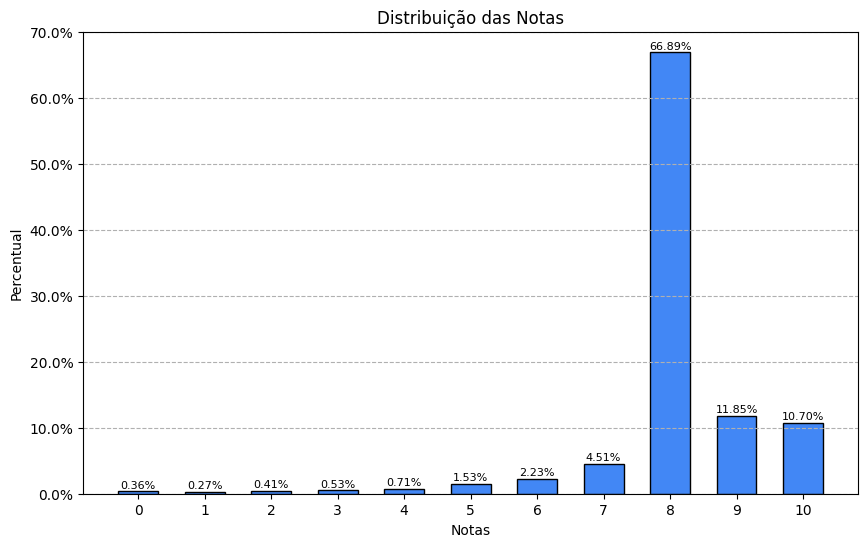

In [ ]:
# Dados das notas
notas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
percentuais = [0.36, 0.27, 0.41, 0.53, 0.71, 1.53, 2.23, 4.51, 66.89, 11.85, 10.70]

# Configurações do gráfico
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.bar(notas, percentuais, width=0.6, color='#4287f5', edgecolor='black')  # Largura das barras, cor e borda
plt.xticks(notas)  # Rótulos no eixo x
plt.xlabel('Notas')
plt.ylabel('Percentual')
plt.title('Distribuição das Notas')
plt.ylim(0, 70)  # Limites do eixo y
plt.grid(axis='y', linestyle='--')  # Grade horizontal
plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)  # Formatação dos valores do eixo y

# Adicionar valores nas barras
for i, valor in enumerate(percentuais):
    plt.text(notas[i], valor + 0.5, f'{valor:.2f}%', ha='center', fontsize=8)

# Exibir o gráfico
plt.show()


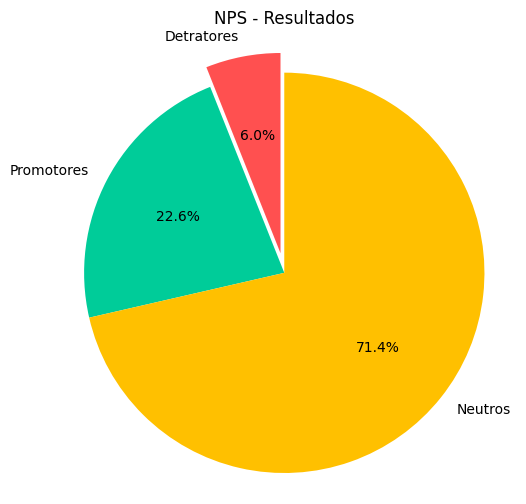

In [ ]:
# Dados dos detratores, promotores e neutros
dados = [detratores, promotores, neutros]
labels = ['Detratores', 'Promotores', 'Neutros']
colors = ['#FF5050', '#00CC99', '#FFC000']
explode = [0.1, 0, 0]  # Explodir a primeira fatia (detratores)

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(dados, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('NPS - Resultados')
plt.axis('equal')

# Exibir o gráfico de pizza
plt.show()
